In [1]:
import numpy as np
from numpy import array as arr
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [2]:
Q = 50/arr([16.77, 18.5, 24.5, 35, 50, 60.3, 91, 120, 323, 100000])

data = {'Height(mm)': arr([60, 57, 50, 43, 37, 30, 23, 18, 10, 0.1]),
        'Time(s)':   arr([16.77, 18.5, 24.5, 35, 50, 60.3, 91, 120, 323]),
        'Q(l/s)':    Q
}
print(Q)

[2.98151461e+00 2.70270270e+00 2.04081633e+00 1.42857143e+00
 1.00000000e+00 8.29187396e-01 5.49450549e-01 4.16666667e-01
 1.54798762e-01 5.00000000e-04]


In [3]:
x = data['Q(l/s)']
y = data['Height(mm)']

def log_fn(x, amplitude, phase, offset):
    return amplitude * np.log(x + phase) + offset

guess_amplitude = np.std(y)**2 # amp is the A param, note how our first guess will be
guess_phase = 0 # phase is C param, arbitrary guess
guess_offset = np.mean(y) # offset is B param (the vertical translation of the graph)

# persist the initial guesses (seed) in a list for the curve_fit method
p0=[guess_amplitude,
    guess_phase,
    guess_offset]

popt, pcov = curve_fit(log_fn, x, y, p0=p0)

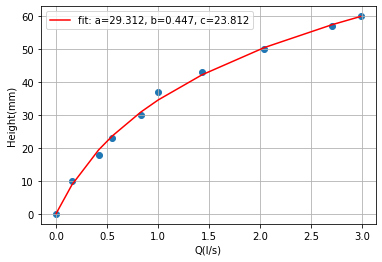

In [4]:
plt.scatter(data['Q(l/s)'], data['Height(mm)'])
plt.plot(x, log_fn(x, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.xlabel('Q(l/s)',)
plt.ylabel('Height(mm)')
plt.legend()
plt.grid(True)

plt.savefig('Debit fct de inaltimea deversorului.png', dpi = 500)